# Exp. - Title here copied from evernote

Evernote experiment: PUT NOTE LINK HERE

In [145]:
# import modules
from __future__ import division
import csv
import numpy as np
import matplotlib 
import pylab as plt
%matplotlib inline

# define useful functions for reading data
def cell_data(path, verbose=False):
    '''Reads data from the .csv written by agarPad.py'''
    %cd $path
    csvfile = open('./intensity.txt', 'r')
    data = csv.reader(csvfile, delimiter =',')
    cell_int_tot = np.array([])
    cell_int_avg = np.array([])
    for row in data:
        cell_int_tot = np.append(cell_int_tot, np.float(row[1]))
        cell_int_avg = np.append(cell_int_avg, np.float(row[0]))
        
    if verbose:
        print('there are ', len(cell_int_tot), 'cells')
    return cell_int_tot, cell_int_avg

def graph_int_hist(cell_int_tot, cell_int_avg):
    '''Graphs histograms of total and average cell intensity.'''
    # graph 
    plt.figure(num=None, figsize=(14, 14), dpi=80, facecolor='w', edgecolor='k')
    plt.subplot(2, 2, 1)
    plt.hist(cell_int_tot, 100)
    plt.title('Frequency of total cell intensity')

    plt.subplot(2, 2, 2)
    plt.hist(cell_int_avg, 100)
    plt.title('Frequency of average cell intensity')

    # filter and replot
    cell_int_avg_filter = cell_int_avg[cell_int_avg < 2000]
    cell_int_tot_filter = cell_int_tot[cell_int_tot < 2000000]
    
    plt.subplot(2, 2, 3)
    plt.hist(cell_int_tot_filter, 100)
    plt.title('Frequency of total cell intensity')

    plt.subplot(2, 2, 4)
    plt.hist(cell_int_avg_filter, 100)
    plt.title('Frequency of average cell intensity')
    plt.show()
    
# get files in order
# these are dictionaries that links short name to folder name
form_paths = {'Mglc':'20150921_SJ358_Mglc_form-fix_ho-3ug-ml',
              'Mglc6aa':'20150921_SJ358_Mglc6AA_form-fix_ho-3ug-ml',
              'Mglc12aa':'20150921_SJ358_Mglc12AA_form-fix_ho-3ug-ml',
              'MRglc':'20150904_SJ358_dna_stain_T1_form_A',
              'Mgly':'20150921_SJ358_Mgly_form-fix_ho-3ug-ml'}

etoh_paths = {'Mglc':'20150921_SJ358_Mglc_etoh-fix_ho-3ug-ml',
              'Mglc6aa':'20150921_SJ358_Mglc6aa_etoh-fix_ho-3ug-ml',
              'Mglc12aa':'20150921_SJ358_Mglc12aa_etoh-fix_ho-3ug-ml',
              'MRglc':'20150921_SJ358_MRglc_etoh-fix_ho-3ug-ml',
              'Mgly':'20150921_SJ358_Mgly_etoh-fix_ho-3ug-ml'}

# these functions 
def make_form_path(pathkey):
    return '/Users/jt/data/20150917_SJ358_tstat_dna_stain/' + form_paths[pathkey]

def make_etoh_path(pathkey):
    return '/Users/jt/data/20150917_SJ358_tstat_dna_stain/' + etoh_paths[pathkey]

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

def graph_form_vs_etoh(mediakey, tot_thresh=0.2*10**7, avg_thresh=5000, verbose=False):
    '''Graph overlaid histogram data from from and etoh fixed cells'''
    
    # get data from .csvs
    cell_int_tot_form, cell_int_avg_form = cell_data(make_form_path(mediakey))
    cell_int_tot_etoh, cell_int_avg_etoh = cell_data(make_etoh_path(mediakey))

    if verbose:
        print(len(cell_int_tot_form))
        print(len(cell_int_avg_form))
        print(len(cell_int_tot_etoh))
        print(len(cell_int_avg_etoh))

    # filter out the low peaks based on graphs above
    cell_int_tot_form = cell_int_tot_form[cell_int_tot_form > tot_thresh]
    cell_int_avg_form = cell_int_avg_form[cell_int_avg_form > avg_thresh]
    cell_int_tot_etoh = cell_int_tot_etoh[cell_int_tot_etoh > tot_thresh]
    cell_int_avg_etoh = cell_int_avg_etoh[cell_int_avg_etoh > avg_thresh]

    if verbose:
        print(len(cell_int_tot_Mglc_form))
        print(len(cell_int_avg_Mglc_form))
        print(len(cell_int_tot_Mglc_etoh))
        print(len(cell_int_avg_Mglc_etoh))

    if True:
        plt.figure(num=None, figsize=(16,8), dpi=80, facecolor='w', edgecolor='k', linewidth=3)
        plt.suptitle('E. coli NCM3722 MOPS glycerol, raw fluorescence intensity per cell', fontsize=18)
        
        plt.subplot(1,2,1)
        plt.title('frequency of total cell intensity, raw')
        plt.xlabel('intensity')
        plt.ylabel('pdf')
        plt.hist(cell_int_tot_form, 50, normed=1, histtype='step', linewidth=3)
        plt.hist(cell_int_tot_etoh, 50, normed=1, histtype='step', linewidth=3)
        plt.ylim([0,3.5*10**-7])
        plt.legend(['form', 'EtOH'])

        plt.subplot(1,2,2)
        plt.title('frequency of mean cell intensity, raw')
        plt.xlabel('intensity')
        plt.ylabel('pdf')
        plt.hist(cell_int_avg_form, 50, normed=1, histtype='step', linewidth=3)
        plt.hist(cell_int_avg_etoh, 50, normed=1, histtype='step', linewidth=3)
        plt.ylim([0,3*10**-4])
        plt.legend(['form', 'EtOH'])
        plt.show()

## Put what analysis is being done here

And explain it here

### Name of first condition

In the first block analyze the data with agarPad.py:

    TIFFpath = make_form_path('Mgly') + '/TIFF' # this is the directory of the TIFFs
    %cd /Users/jt/drive/code/agarPad/ # this magic changes the folder to run agarPad
    %run agarPad.py $TIFFpath # agarPad.py takes the TIFF path at the argument
    
In the second block start your analysis and graphing. You can use the plotting tools above. 
    
    cell_int_tot, cell_int_avg = cell_data(make_form_path('Mgly'))
    graph_int_hist(cell_int_tot, cell_int_avg)

In [60]:
# analyze data

/Users/jt/drive/code/agarPad
Reading files.
Found 25 files:
Writing file
Finished
/Users/jt/drive/code/agarPad
Reading files.
Found 144 files:
Writing file
Finished


/Users/jt/data/20150917_SJ358_tstat_dna_stain/20150921_SJ358_Mgly_form-fix_ho-3ug-ml
('there are ', 802, 'cells')


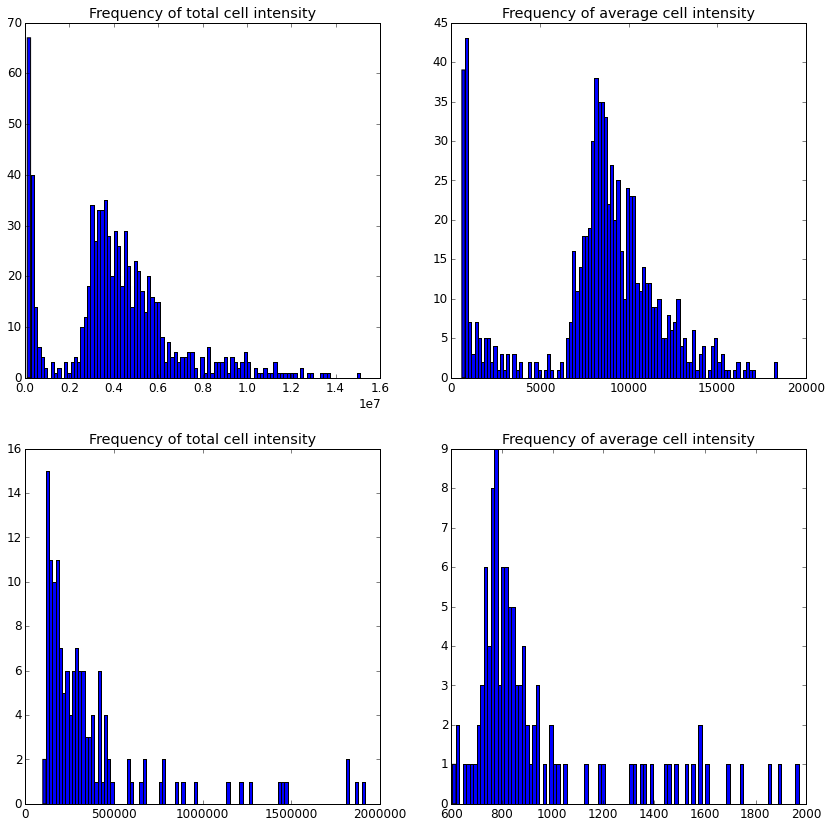

/Users/jt/data/20150917_SJ358_tstat_dna_stain/20150921_SJ358_Mgly_etoh-fix_ho-3ug-ml
('there are ', 18208, 'cells')


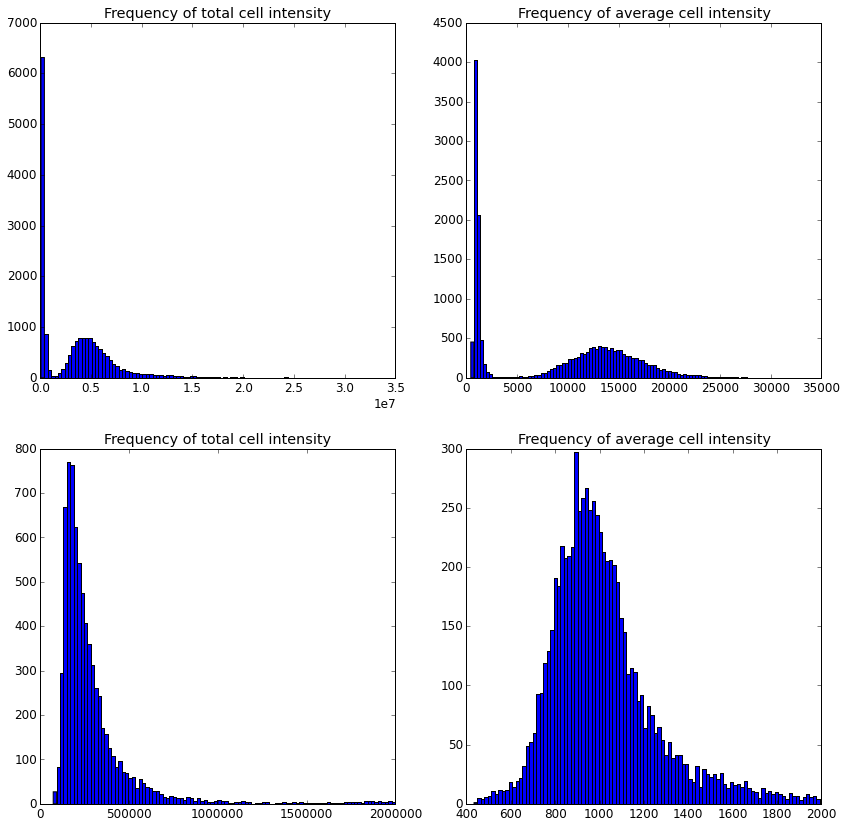

In [65]:
# graph
cell_int_tot, cell_int_avg = cell_data(make_form_path('Mgly'))
graph_int_hist(cell_int_tot, cell_int_avg)
cell_int_tot, cell_int_avg = cell_data(make_etoh_path('Mgly'))
graph_int_hist(cell_int_tot, cell_int_avg)